## Classification-Guided Encoding MNIST

In [1]:
import torch
import argparse
import MNIST_122   
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Data Loading

### What We Do:
- Use **MNIST** dataset (28×28 grayscale images, 10 classes).
- Apply only **ToTensor()** for preprocessing.
- Data split: 80% train, 10% val, 10% test.

### Why It Helps:
- MNIST is clean and simple, so no heavy augmentations are needed.
- `ToTensor()` converts images to the right format and scale for PyTorch models.

---

## 2. Encoder Model

### Layer Breakdown:
1. **Conv Layer 1 (1 → 16 channels)**  
   - Stride 2, kernel size 3  
   - Reduces size to 14×14  
   - ReLU for non-linearity  

2. **Conv Layer 2 (16 → 32 channels)**  
   - Another stride-2 conv layer  
   - Down to 7×7  
   - Learns more abstract features  

3. **Linear Layer to Latent Space (32×7×7 → 128)**  
   - Flattens and reduces dimensionality  
   - Outputs latent feature vector

### Why It Works:
- Simple architecture fits the MNIST dataset well.
- Latent space is compact but expressive enough for digit classification.

---

## 3. Classifier Model

### What It Looks Like:
- Fully connected layers:  
  - `128 → 64 → 10`  
  - ReLU + Dropout(0.2) in between

### Why It Works:
- Lightweight and fast to train  
- Dropout helps avoid overfitting  
- Sufficient for clean MNIST latent space

---

## 4. Training Setup

| Component            | Value         | Why It Works                      |
|----------------------|---------------|-----------------------------------|
| Loss Function        | CrossEntropy  | Standard for classification       |
| Optimizer            | Adam          | Fast convergence and stability    |
| Batch Size           | args.batch_size | Flexible per GPU memory         |
| Epochs               | 15            | Enough to converge on MNIST       |
| Learning Rate        | 0.001         | Works well with Adam              |

---

## 5. Training Loop Logic

### Per Epoch:
- Forward pass through encoder + classifier  
- Backprop for both models  
- Track accuracy and loss  
- Validate after each epoch  

### Why It’s Good:
- Keeps training and validation performance visible  
- Helps detect overfitting early  
- Modular and reusable design

---


In [2]:
train_loader, val_loader, test_loader = MNIST_122.load_data(args)
encoder_model = MNIST_122.Encoder(args.latent_dim).to(args.device)
classifier_model = MNIST_122.Classifier(args.latent_dim).to(args.device)

## Training Autoencoder Classifier

Epoch [1/1], Train Loss: 0.4822, Train Acc: 85.08%, Val Loss: 0.1519, Val Acc: 95.51%


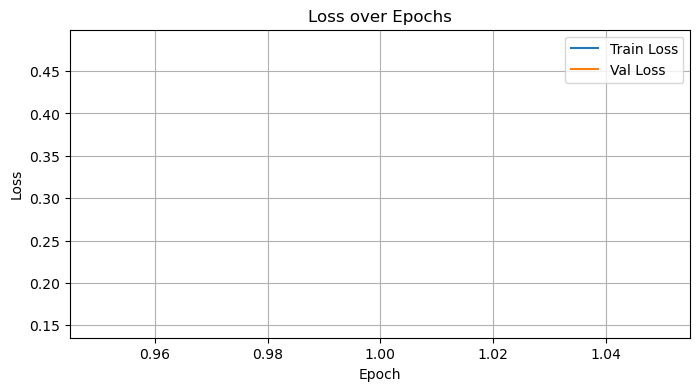

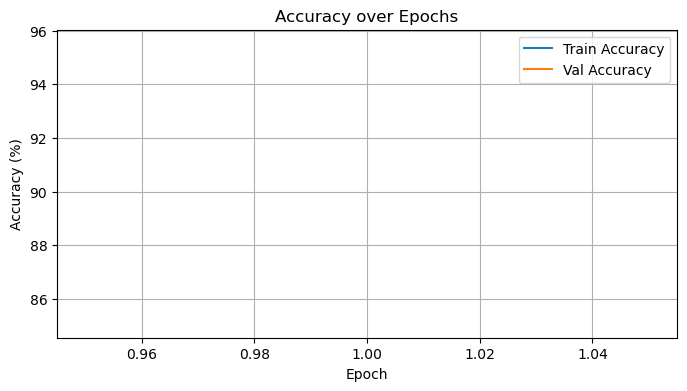

In [3]:
MNIST_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader, args, epochs=1)

## t-SNE Analysis of Latent Spaces

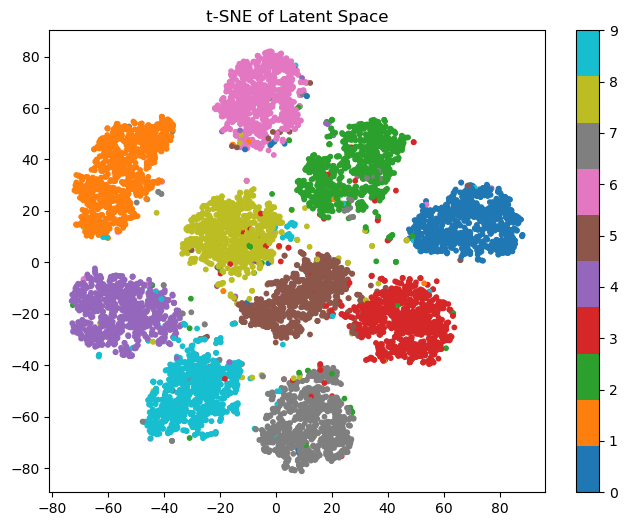

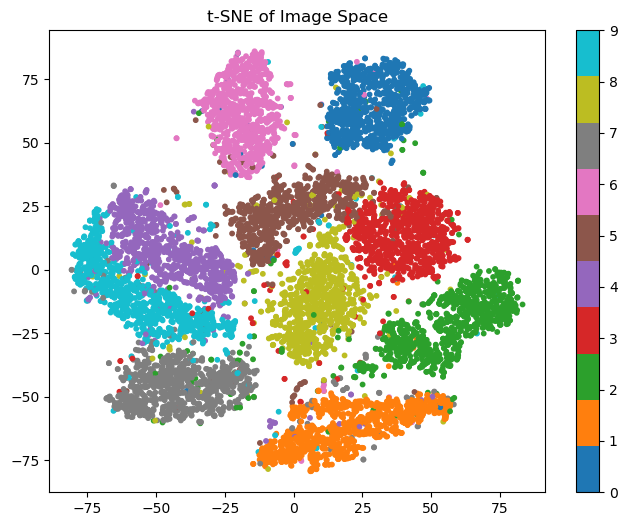

In [4]:
MNIST_122.plot_tsne(encoder_model, test_loader, args.device)